In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import folium

from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv("./data/19zpallnoagi.csv")
df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01400,A01400,N01700,A01700,SCHF,N02300,A02300,N02500,A02500,N26270,A26270,N02900,A02900,N03220,A03220,N03300,A03300,N03270,A03270,N03150,A03150,N03210,A03210,N04450,A04450,N04100,A04100,N04200,A04200,N04470,A04470,A00101,N17000,A17000,N18425,A18425,N18450,A18450,N18500,A18500,N18800,A18800,N18460,A18460,N18300,A18300,N19300,A19300,N19500,A19500,N19530,A19530,N19570,A19570,N19700,A19700,N20950,A20950,N04475,A04475,N04800,A04800,N05800,A05800,N09600,A09600,N05780,A05780,N07100,A07100,N07300,A07300,N07180,A07180,N07230,A07230,N07240,A07240,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,0,2100740.00,914850.00,743250.00,395440.00,1925700.00,75480.00,1116020.00,1434160.00,4085710.00,31000.00,22690.00,8310.00,4490.00,414360.00,511240.00,130815070.00,2100670.00,132129733.00,1760950.00,91213539.00,552680.00,1100308.00,268270.00,2122402.00,245060.00,1609924.00,76450.00,90443.00,359160.00,3374570.00,231930.00,4881146.00,186930.00,3420409.00,424560.00,11155464.00,38620.00,34990.00,107337.00,327590.00,4991389.00,86660.00,7018482.00,463380.00,1314663.00,43800.00,11260.00,4400.00,116134.00,34650.00,275100.00,19590.00,93986.00,139600.00,155085.00,1931320.00,33805170.00,1931270.00,33154524.00,327750.00,647390.00,166360.00,5909478.00,34290184.00,45810.00,654479.00,133920.00,1214226.00,23680.00,42843.00,136710.00,335791.00,110740.00,46929.00,159670.00,1006379.00,164780.00,1045271.00,122240.00,1294464.00,720.00,5859.00,5110.00,2848.00,5900.00,64815.00,147810.00,2343223.00,7070.00,127247.00,229930.00,1509419.00,1617000.00,91874439.00,1615690.00,15030269.00,380.00,4636.00,34500.00,37929.00,797610.00,1482959.00,69820.00,65687.00,95670.00,55005.00,119770.00,128328.00,154010.00,29858.00,576980.00,1089134.00,23690.00,26485.00,253170.00,695726.00,78910.00,672888.00,85930.00,731410.00,2007350.00,17896016.00,486090.00,1348466.00,443720.00,1209646.00,356250.00,621805.00,116190.00,105274.00,23950.00,17716.00,1329580.00,13520654.00,1469630.00,14554116.00,30540.00,50703.00,39520.00,141384.00,418210.00,1875183.00,1633620.00,5232476.00,1603620.00,4711318.00,32340.00,463956.00
1,1,AL,35004,0,5330.00,2310.00,2060.00,840.00,4910.00,200.00,2440.00,3740.00,10360.00,30.00,30.00,0.00,0.00,990.00,1230.00,315055.00,5330.00,317526.00,4620.00,259009.00,1360.00,1408.00,580.00,1410.00,510.00,986.00,250.00,263.00,750.00,5915.00,460.00,3056.00,490.00,7078.00,960.00,21538.00,0.00,70.00,267.00,800.00,11021.00,140.00,4915.00,1270.00,2471.00,130.00,32.00,0.00,0.00,50.00,367.00,60.00,207.00,590.00,695.00,4950.00,88349.00,4950.00,86718.00,840.00,1632.00,400.00,10517.00,44806.00,120.00,1606.00,340.00,1783.00,40.00,68.00,330.00,378.00,280.00,90.00,380.00,2038.00,390.00,2067.00,320.00,2382.00,0.00,0.00,0.00,0.00,0.00,0.00,350.00,3875.00,0.00,0.00,510.00,1961.00,4380.00,219380.00,4390.00,30230.00,0.00,0.00,120.00,148.00,2030.00,4335.00,90.00,5.00,410.00,244.00,300.00,334.00,370.00,67.00,1590.00,3533.00,60.00,69.00,520.00,1177.00,190.00,1870.00,220.00,2051.00,5130.00,35790.00,820.00,1925.00,710.00,1691.00,650.00,1112.00,240.00,197.00,50.00,40.00,3850.00,25896.00,4090.00,27425.00,30.00,18.00,20.00,30.00,1120.00,2718.00,4120.00,11050.00,4060.00,10414.00,70.00,320.00
2,1,AL,35005,0,3280.00,1520.00,800.00,900.00,2980.00,120.00,1670.00,2470.00,6060.00,40.00,40.00,0.00,0.00,920.00,750.00,133950.00,3280.00,134803.00,2800.00,109801.00,460.00,417.00,150.00,217.00,130.00,149.00,140.00,117.00,520.00,81.00,100.00,173.00,230.00,3112.00,610.00,13464.00,0.00,50.00,148.00,470.00,5354.00,30.00,279.00,540.00,853.00,50.00,13.00,0.00,0.00,0.00,0

In [3]:
df.shape

(27695, 152)

since we are pay attention to income, im going use just STATE, ZIPCODE, A00100(Adjust gross income (AGI)), N02650(Number of returns with total income) and A02650(Total income amount) columns. also we removed zipcode 00000 and 99999 rows. because zipcode 00000 means that aggregations for that state (sum) and 99999 means, from the source: "ZIP codes with less than 100 returns and those identified as a single building or nonresidential ZIP code were categorized as “other” (99999)." -- TODO: continue *******

I will continue analysis with comparing both strategies like, just using the A02650(Total income amount) column and using  A00100(Adjust gross income (AGI)), N02650(Number of returns with total income) and A02650(Total income amount) columns to how well clustering applied to dataset and choose one of the strategy.

In [4]:
df_income = df[(df["ZIPCODE"]!=0) & (df["ZIPCODE"]!=99999)].iloc[:,list(range(1, 3)) + list(range(19, 22))]
df_income.rename(columns={"A00100": "ADJUSTED_GROSS_INCOME", "N02650": "TOTAL_INCOME_RETURN", "A02650": "TOTAL_INCOME_AMOUNT"}, inplace=True)
df_income.head()

,STATE,ZIPCODE,ADJUSTED_GROSS_INCOME,TOTAL_INCOME_RETURN,TOTAL_INCOME_AMOUNT
1,AL,35004,315055.00,5330.00,317526.00
2,AL,35005,133950.00,3280.00,134803.00
3,AL,35006,67289.00,1230.00,67693.00
4,AL,35007,756173.00,12380.00,763960.00
5,AL,35010,459471.00,8090.00,463806.00


some feature engineering

In [5]:
df_income["MEAN_TOTAL_INCOME"] = df_income["TOTAL_INCOME_AMOUNT"] / df_income["TOTAL_INCOME_RETURN"]
df_income.describe().T

,count,mean,std,min,25%,50%,75%,max
ZIPCODE,27593.00,48856.24,27047.66,1001.00,27105.00,48845.00,70578.00,99901.00
ADJUSTED_GROSS_INCOME,27593.00,428488.35,723203.13,1306.00,32745.00,118192.00,533730.00,12229642.00
TOTAL_INCOME_RETURN,27593.00,5510.11,7310.86,90.00,600.00,1990.00,8020.00,59000.00
TOTAL_INCOME_AMOUNT,27593.00,433438.17,731859.73,1306.00,33118.00,119539.00,539463.00,12331790.00
MEAN_TOTAL_INCOME,27593.00,69.83,55.67,12.70,48.23,57.57,72.88,3296.83


In [8]:
df_income_more_column = df_income.copy()
df_income_one_column = df_income.loc[:, ["STATE", "ZIPCODE","TOTAL_INCOME_AMOUNT"]]

In [9]:
df_income_more_column.head()

,STATE,ZIPCODE,ADJUSTED_GROSS_INCOME,TOTAL_INCOME_RETURN,TOTAL_INCOME_AMOUNT,MEAN_TOTAL_INCOME
1,AL,35004,315055.00,5330.00,317526.00,59.57
2,AL,35005,133950.00,3280.00,134803.00,41.10
3,AL,35006,67289.00,1230.00,67693.00,55.03
4,AL,35007,756173.00,12380.00,763960.00,61.71
5,AL,35010,459471.00,8090.00,463806.00,57.33


In [10]:
df_income_one_column.head()

,STATE,ZIPCODE,TOTAL_INCOME_AMOUNT
1,AL,35004,317526.00
2,AL,35005,134803.00
3,AL,35006,67693.00
4,AL,35007,763960.00
5,AL,35010,463806.00


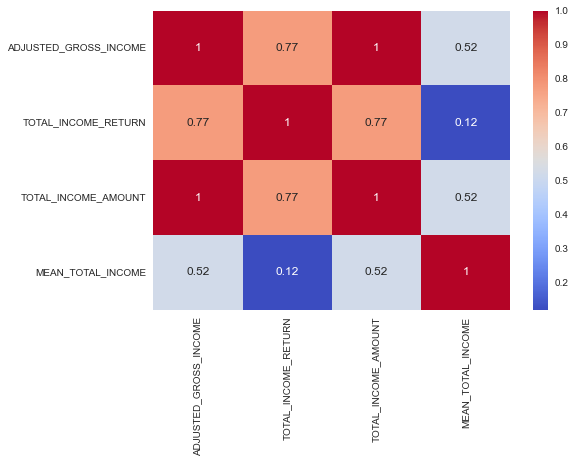

In [11]:
sns.heatmap(df_income_more_column.iloc[:,2:].corr(), cmap="coolwarm", annot=True);

since ADJUSTED_GROSS_INCOME and TOTAL_INCOME_AMOUNT highly correlated we can use one of them or apply pca and transform into one feature or maybe averaging two of them into one feature. im gonna just drop ADJUSTED_GROSS_INCOME column.

In [12]:
df_income_more_column.drop(columns="ADJUSTED_GROSS_INCOME", inplace=True)
df_income_more_column.head()

,STATE,ZIPCODE,TOTAL_INCOME_RETURN,TOTAL_INCOME_AMOUNT,MEAN_TOTAL_INCOME
1,AL,35004,5330.00,317526.00,59.57
2,AL,35005,3280.00,134803.00,41.10
3,AL,35006,1230.00,67693.00,55.03
4,AL,35007,12380.00,763960.00,61.71
5,AL,35010,8090.00,463806.00,57.33


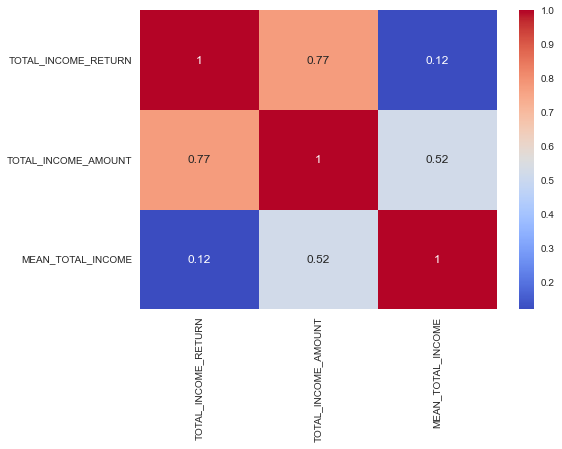

In [13]:
sns.heatmap(df_income_more_column.iloc[:,2:].corr(), cmap="coolwarm", annot=True);


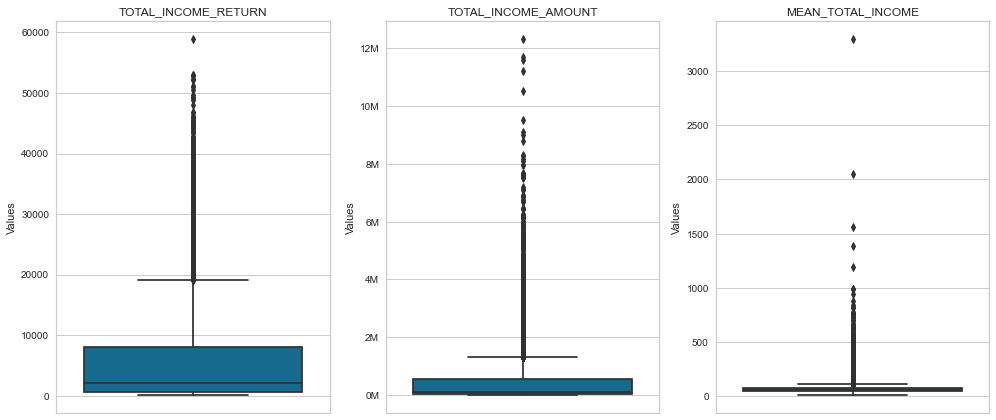

In [14]:
columns_to_plot = ['TOTAL_INCOME_RETURN', 'TOTAL_INCOME_AMOUNT', 'MEAN_TOTAL_INCOME']

# Create subplots in a grid for the specified columns
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

# Plot each column's boxplot in a separate subplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=df_income_more_column[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

    # Check if the maximum value in the column is greater than or equal to 1e7 (10 million)
    if df_income_more_column[column].max() >= 1e7:
        axes[i].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))  # Format in millions

plt.tight_layout()
plt.show()

c:\Users\Furka\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\Furka\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\Furka\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


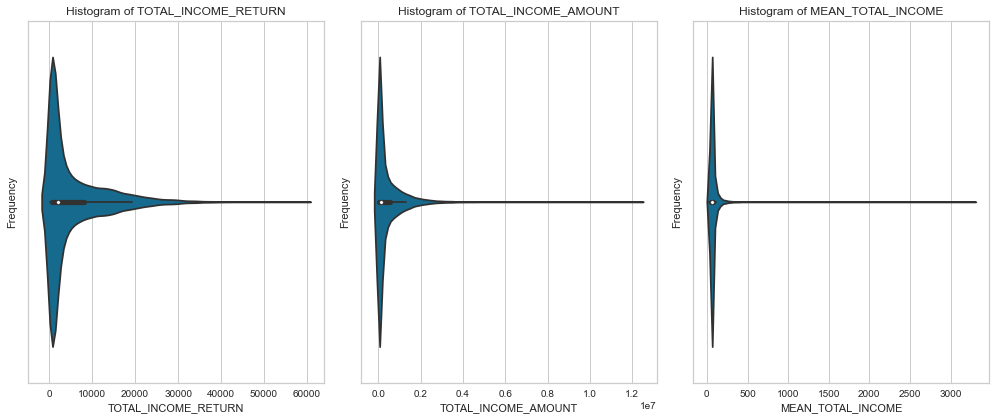

In [15]:

# Create subplots in a grid
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    sns.violinplot(df_income_more_column[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

since the data does not follow normal distribution we should use min-max normalization for modelling both strategies

we just need income related columns for modelling so we use them.

In [16]:
df_model_more_column = df_income_more_column.loc[:, ['TOTAL_INCOME_RETURN', 'TOTAL_INCOME_AMOUNT', 'MEAN_TOTAL_INCOME']]
df_model_one_column = df_income_one_column.loc[:, ['TOTAL_INCOME_AMOUNT']]


In [17]:
df_model_more_column.isna().sum()

TOTAL_INCOME_RETURN    0
TOTAL_INCOME_AMOUNT    0
MEAN_TOTAL_INCOME      0
dtype: int64

In [19]:
df_model_more_column.duplicated().sum()

15

There could be some zipcodes that have same attributes and we need all zipcodes for clustering so we are keeping these duplicate rows.

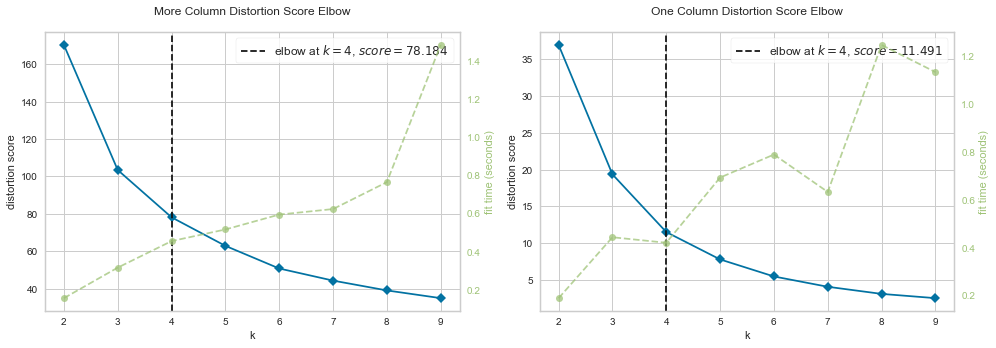

In [32]:
def k_value(df_model_more_column, df_model_one_column):
    scaler = MinMaxScaler()
    
    # Model with more columns
    df_scaled_more_column = scaler.fit_transform(df_model_more_column)
    ssd_1 = []
    for k in range(2, 11):
        model_1 = KMeans(n_clusters=k)
        model_1.fit(df_scaled_more_column)
        ssd_1.append(model_1.inertia_)
    
    # Model with fewer columns
    df_scaled_one_column = scaler.fit_transform(df_model_one_column)
    ssd_2 = []
    for k in range(2, 11):
        model_2 = KMeans(n_clusters=k)
        model_2.fit(df_scaled_one_column)
        ssd_2.append(model_2.inertia_)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    elbow_score_1 = KElbowVisualizer(KMeans(random_state=42, max_iter=500), k=(2, 10), ax=axes[0])
    elbow_score_1.fit(df_scaled_more_column)
    elbow_score_1.finalize()
    elbow_score_1.ax.set_title('More Column Distortion Score Elbow\n')

    elbow_score_2 = KElbowVisualizer(KMeans(random_state=42, max_iter=500), k=(2, 10), ax=axes[1])
    elbow_score_2.fit(df_scaled_one_column)
    elbow_score_2.finalize()
    elbow_score_2.ax.set_title('One Column Distortion Score Elbow\n')
    
    plt.tight_layout()
    plt.show()

# Call the function and pass your DataFrames
k_value(df_model_more_column, df_model_one_column)

for both strategies k=4 looks best

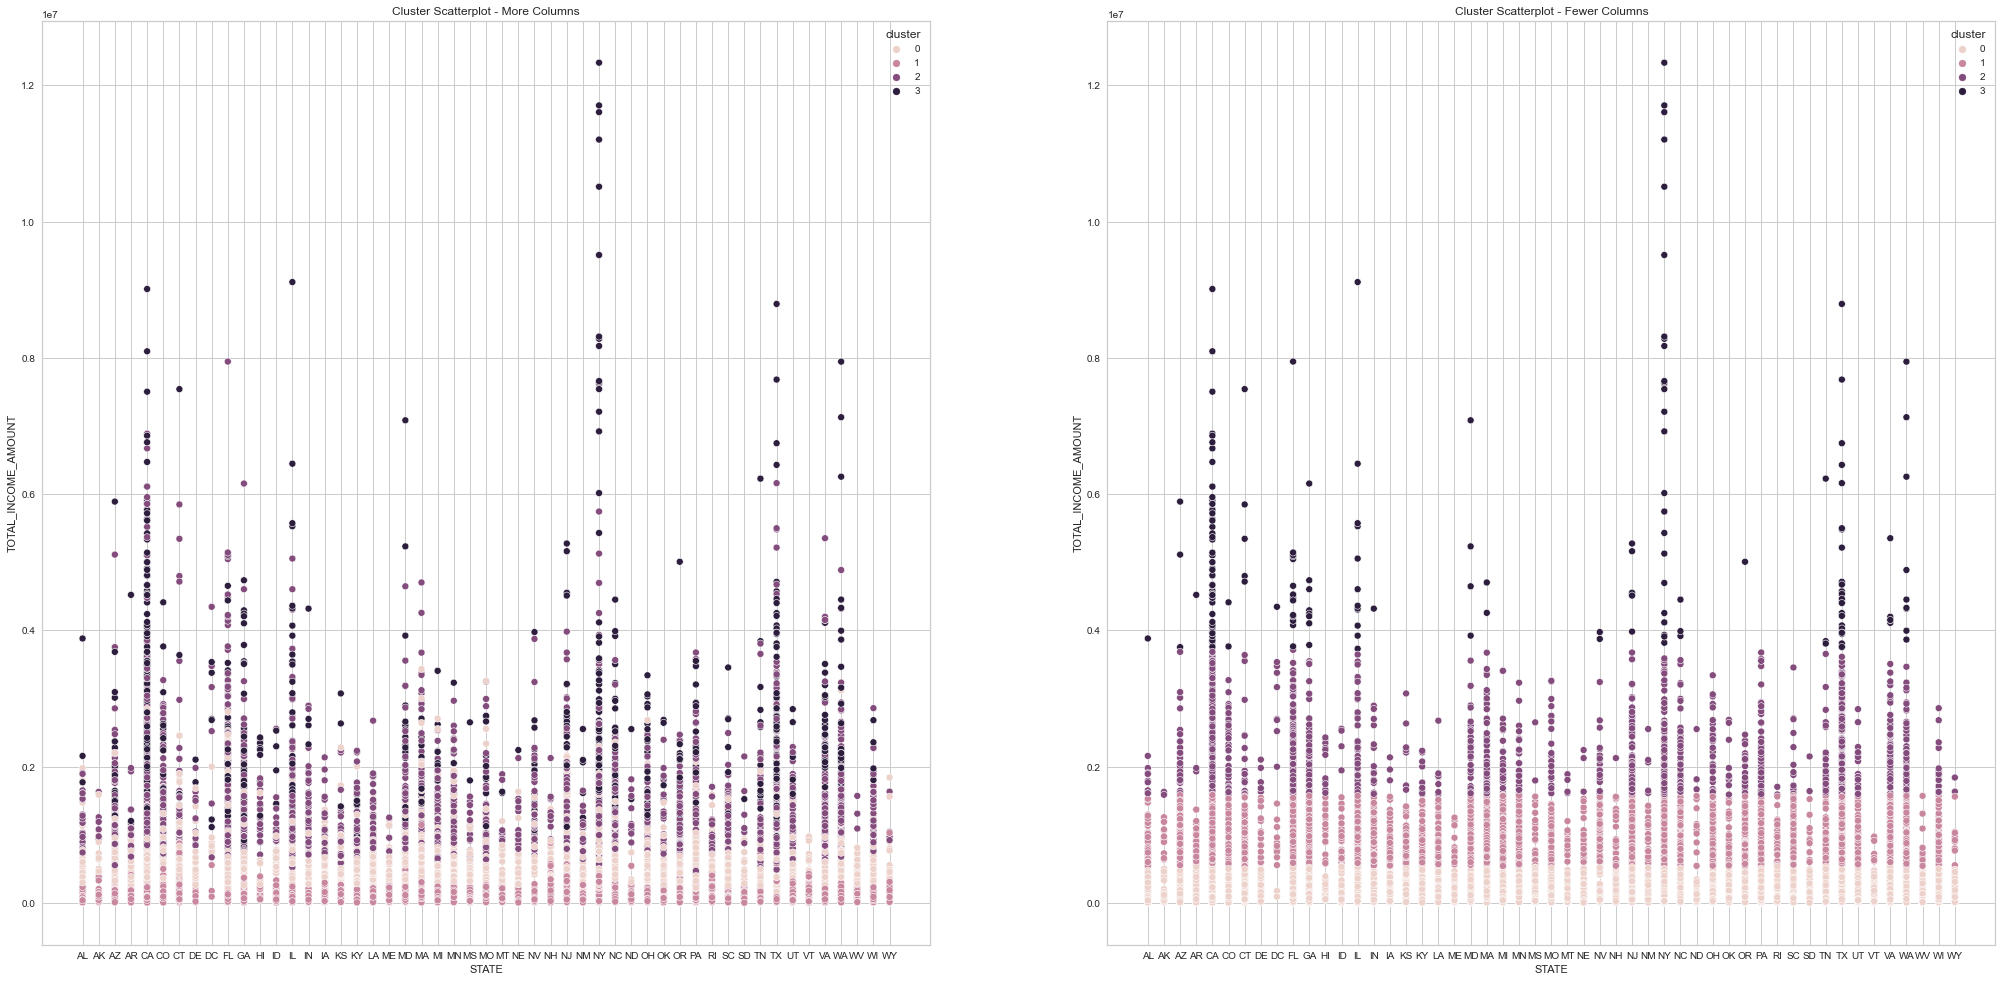

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

def kmeans_and_scatterplot(df_model_three_column, df_model_one_column):
    scaler = MinMaxScaler()

    # Model with more columns
    df_scaled_1 = scaler.fit_transform(df_model_three_column)
    kmeans_model_1 = KMeans(n_clusters=4)
    cluster_labels_1 = kmeans_model_1.fit_predict(df_scaled_1)
    df_cluster_1 = df_income_more_column.copy()
    df_cluster_1["cluster"] = cluster_labels_1

    # Model with fewer columns
    df_scaled_2 = scaler.fit_transform(df_model_one_column)
    kmeans_model_2 = KMeans(n_clusters=4)
    cluster_labels_2 = kmeans_model_2.fit_predict(df_scaled_2)
    df_cluster_2 = df_income_one_column.copy()
    df_cluster_2["cluster"] = cluster_labels_2

    # Scatter plot for first DataFrame
    fig, axes = plt.subplots(1, 2, figsize=(35, 17))
    
    sns.scatterplot(ax=axes[0], x=df_cluster_1["STATE"], y=df_cluster_1["TOTAL_INCOME_AMOUNT"], hue=df_cluster_1["cluster"], data=df_cluster_1)
    axes[0].set_title('Cluster Scatterplot - More Columns')

    sns.scatterplot(ax=axes[1], x=df_cluster_2["STATE"], y=df_cluster_2["TOTAL_INCOME_AMOUNT"], hue=df_cluster_2["cluster"], data=df_cluster_2)
    axes[1].set_title('Cluster Scatterplot - Fewer Columns')

    plt.show()

    return df_cluster_1, df_cluster_2

# Call the function with your DataFrames
df_three_column_cluster, df_one_column_cluster = kmeans_and_scatterplot(df_model_more_column, df_model_one_column)

The cluster distinctions on df_one_column_cluster dataset are more obvious because we used single feature and that distinction is expected. For the conclusions I use df_one_column_cluster data.

We plot the clusters with interactive folium map. We use the outsource data for the latitude and longitude values of zipcodes.

In [134]:
df_one_column_cluster.to_csv("one_column_cluster.csv", index=False)

In [62]:
df_lat_lng = pd.read_csv("./data/zip_lat_long.csv", dtype={'ZIP': str})
df_zip = pd.read_csv("./data/19zpallnoagi.csv", dtype={'ZIPCODE': str}).iloc[:,1:3]

df_zip["cluster"] = df_one_column_cluster["cluster"]

df_zip.dropna(inplace=True)

df_merged = pd.merge(df_zip, df_lat_lng, left_on="ZIPCODE", right_on="ZIP", how='left')
df_merged.head()


,STATE,ZIPCODE,cluster,ZIP,LAT,LNG
0,AL,35004,0.00,35004,33.60,-86.49
1,AL,35005,0.00,35005,33.60,-87.00
2,AL,35006,0.00,35006,33.42,-87.21
3,AL,35007,1.00,35007,33.22,-86.80
4,AL,35010,0.00,35010,32.92,-85.94


In [77]:
def map(df):
    map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
    colors = {0.0: 'red', 1.0: 'blue', 2.0: 'green', 3.0: 'yellow'} 
    # Iterate through the DataFrame
    for index, row in df.iterrows():
        # Add a marker for each data point with different cluster colors
        folium.CircleMarker(
            location=[row['LAT'], row['LNG']],
            radius=5,
            popup=f"Cluster: {row['cluster']}",
            color=colors[row['cluster']],  # Use color mapping from the colors dictionary
            fill=True,
            fill_color=colors[row['cluster']]  # Use color mapping from the colors dictionary
        ).add_to(map)
    return map

df_cluster_zero = df_merged[df_merged["cluster"]==0]
df_cluster_one = df_merged[df_merged["cluster"]==1]
df_cluster_two = df_merged[df_merged["cluster"]==2]
df_cluster_three = df_merged[df_merged["cluster"]==3]


df_non_zero = df_merged[df_merged["cluster"]!=0]
df_non_zero_one = df_merged[(df_merged["cluster"]!=0) & (df_merged["cluster"]!=1)]

#single cluster map
cluster_zero_map = map(df_cluster_zero)
cluster_one_map = map(df_cluster_one)
cluster_two_map = map(df_cluster_two)
cluster_three_map = map(df_cluster_three)

#multiple cluster maps
cluster_all_map = map(df_merged)
cluster_non_zero_map = map(df_non_zero)
cluster_non_zero_one_map = map(df_non_zero_one)

In [83]:
#if we want to see maps on notebook we simply run the map variable like below. (other maps: cluster_zero_map, cluster_one_map, cluster_non_zero_map etc.)

#cluster_all_map


In [82]:
#We extract maps to html files. 
cluster_zero_map.save('cluster_zero_map.html')
cluster_one_map.save('cluster_one_map.html')
cluster_two_map.save('cluster_two_map.html')
cluster_three_map.save('cluster_three_map.html')

cluster_all_map.save('cluster_all_map.html')
cluster_non_zero_map.save('cluster_non_zero_map.html')
cluster_non_zero_one_map.save('cluster_non_zero_one_map.html')


In [175]:
import plotly.graph_objs as go

def create_static_cluster_map(df):
    colors = {0.0: 'red', 1.0: 'blue', 2.0: 'green', 3.0: 'yellow'}

    # Create a scattermapbox trace for each cluster
    traces = []
    for cluster_val, color in colors.items():
        df_cluster = df[df['cluster'] == cluster_val]
        trace = go.Scattermapbox(
            lon=df_cluster['LNG'],
            lat=df_cluster['LAT'],
            mode='markers',
            marker=dict(
                size=8,
                color=color,
                opacity=0.7,
            ),
            text=[f"Cluster: {cluster_val}" for _ in range(len(df_cluster))],
            hovertext=df_cluster['STATE'],
            name=f'Cluster {cluster_val}'
        )
        traces.append(trace)

    # Set layout for the map
    layout = dict(
        title='Clustered Maps',
        mapbox=dict(
            style='carto-positron',
            bearing=0,
            center=dict(
                lat=37.0902,
                lon=-95.7129
            ),
            pitch=0,
            zoom=3
        ),
        width=1200,  # Adjust the width of the plot
        height=800,  # Adjust the height of the plot
    )

    # Create the figure and display the map
    fig = go.Figure(data=traces, layout=layout)
    return fig.show()

# Assuming 'df_cluster_two' is your DataFrame with columns: STATE, cluster, LAT, LNG
create_static_cluster_map(df_cluster_two)

In [176]:
create_static_cluster_map(df_cluster_three)


In [177]:
create_static_cluster_map(df_cluster_one)


In [185]:
import plotly.express as px

def create_density_cluster_map(df, radius):
    fig = px.density_mapbox(
        df,
        lat='LAT',
        lon='LNG',
        z='cluster',
        radius=radius,
        zoom=3,
        mapbox_style='carto-positron',
        center=dict(lat=37.0902, lon=-95.7129),
        labels={'cluster': 'Cluster Density'},
        hover_name='STATE'
    )
    fig.update_layout(
        title='Density Map of Cluster Counts by State',
        mapbox=dict(
            style='carto-positron',
            center=dict(lat=37.0902, lon=-95.7129),
            zoom=3.5
        ),
        height=900,  # Adjust the height of the plot
        width=1400   # Adjust the width of the plot
    )
    fig.show()

# Assuming 'df_merged' is your DataFrame with state-wise cluster data

In [181]:
create_density_cluster_map(df_cluster_zero,3)


In [180]:
create_density_cluster_map(df_cluster_two,5)


In [188]:
create_density_cluster_map(df_cluster_three,8)


In [123]:
df_merged.head()

,STATE,ZIPCODE,cluster,ZIP,LAT,LNG
0,AL,35004,0.00,35004,33.60,-86.49
1,AL,35005,0.00,35005,33.60,-87.00
2,AL,35006,0.00,35006,33.42,-87.21
3,AL,35007,1.00,35007,33.22,-86.80
4,AL,35010,0.00,35010,32.92,-85.94


In [65]:
df_one_column_cluster.head()

,STATE,ZIPCODE,TOTAL_INCOME_AMOUNT,cluster
1,AL,35004,317526.00,0
2,AL,35005,134803.00,0
3,AL,35006,67693.00,0
4,AL,35007,763960.00,2
5,AL,35010,463806.00,0


In [124]:
df_merged.groupby('STATE')['cluster'].value_counts()

STATE  cluster
AK     0.00         39
       1.00         13
       2.00          2
AL     0.00        519
       1.00         45
       2.00          9
       3.00          1
AR     0.00        444
       1.00         37
       2.00          2
       3.00          1
AZ     0.00        139
       1.00        118
       2.00         32
       3.00          3
CA     0.00        583
       1.00        516
       2.00        317
       3.00         60
CO     0.00        254
       1.00         89
       2.00         49
       3.00          2
CT     0.00        151
       1.00         87
       2.00         19
       3.00          5
DC     1.00         11
       2.00          8
       0.00          2
       3.00          1
DE     0.00         33
       1.00         17
       2.00          5
FL     1.00        406
       0.00        386
       2.00        113
       3.00         14
GA     0.00        486
       1.00        125
       2.00         46
       3.00          8
HI     0.00        

In [125]:
state_cluster_counts = df_merged.groupby(['STATE', 'cluster']).agg(cluster_counts=('cluster', 'size')).reset_index()
state_cluster_counts.head(50)


,STATE,cluster,cluster_counts
0,AK,0.00,39
1,AK,1.00,13
2,AK,2.00,2
3,AL,0.00,519
4,AL,1.00,45
5,AL,2.00,9
6,AL,3.00,1
7,AR,0.00,444
8,AR,1.00,37
9,AR,2.00,2


In [126]:
state_cluster_counts["cluster"] = state_cluster_counts["cluster"].astype("str")

In [128]:
state_cluster_counts.dtypes

STATE             object
cluster           object
cluster_counts     int64
dtype: object

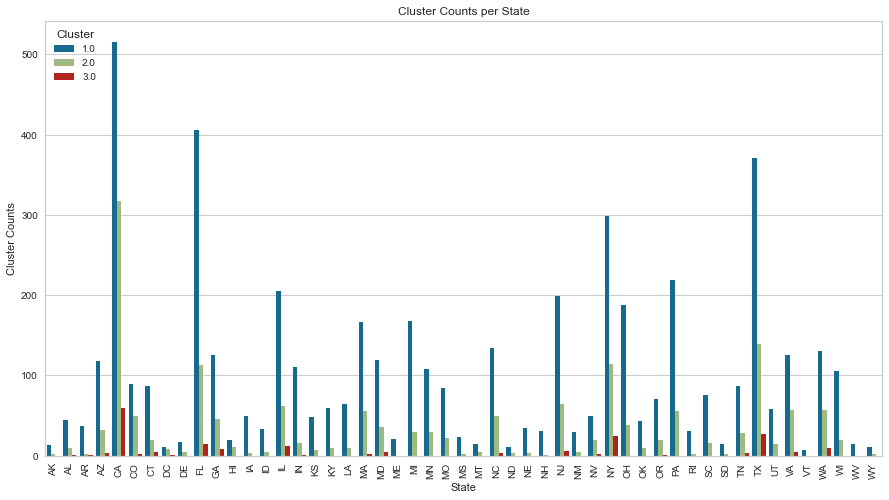

In [131]:
plt.figure(figsize=(15, 8))
sns.barplot(data=state_cluster_counts[state_cluster_counts["cluster"]!="0.0"], x='STATE', y='cluster_counts', hue='cluster')
plt.title('Cluster Counts per State')
plt.xlabel('State')
plt.ylabel('Cluster Counts')
plt.legend(title='Cluster')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [132]:
import plotly.express as px

# Assuming you have state_cluster_counts DataFrame from the previous step

fig = px.bar(state_cluster_counts[state_cluster_counts["cluster"] != "0.0"], x='STATE', y='cluster_counts',
             color='cluster', barmode='group',
             title='Cluster Counts per State', labels={'cluster_counts': 'Cluster Counts'})

fig.update_layout(xaxis_title='State', yaxis_title='Cluster Counts')

fig.update_layout(xaxis_title='State', yaxis_title='Cluster Counts', 
                  width=1200, height=1000) 

fig.show()

In [117]:
fig = px.bar(state_cluster_counts[state_cluster_counts["cluster"].isin(["2","3"])], x='STATE', y='cluster_counts',
             color='cluster', barmode='group',
             title='Cluster Counts per State', labels={'cluster_counts': 'Cluster Counts'})

fig.update_layout(xaxis_title='State', yaxis_title='Cluster Counts')

fig.update_layout(xaxis_title='State', yaxis_title='Cluster Counts', 
                  width=1500, height=1000) 

fig.show()

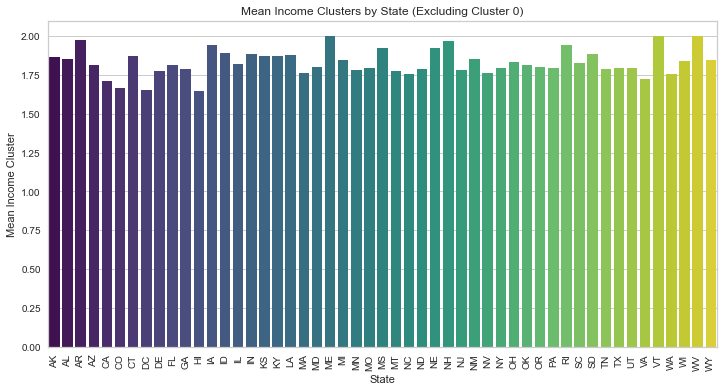

In [70]:
state_income_clusters = df_one_column_cluster[df_one_column_cluster['cluster'] != 0]\
                            .groupby('STATE')['cluster'].mean().reset_index()

# Visualize mean income clusters by state
plt.figure(figsize=(12, 6))
sns.barplot(x='STATE', y='cluster', data=state_income_clusters, palette='viridis')
plt.title('Mean Income Clusters by State (Excluding Cluster 0)')
plt.xlabel('State')
plt.ylabel('Mean Income Cluster')
plt.xticks(rotation=90)
plt.show()